In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines



cd_path = f"./contrastive_decoding.csv"
cd_df = pd.read_csv(cd_path)

In [60]:
columns_to_keep = ["checkpoint", "amateur_checkpoint", "dataset", "accuracy"]
cd_df = cd_df[columns_to_keep]
# for checkpoint, remove the "checkpoint-" prefix
cd_df["checkpoint"] = cd_df["checkpoint"].apply(lambda x: x.split("-")[-1])
cd_df["amateur_checkpoint"] = cd_df["amateur_checkpoint"].apply(lambda x: x.split("-")[-1])

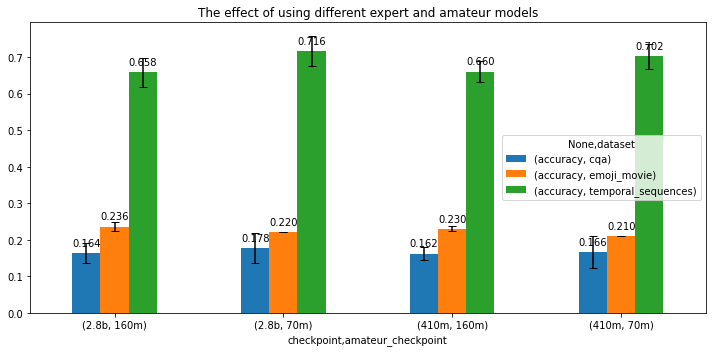

In [61]:
# datasets=["conceptual_combinations", "copa", "cqa", "emoji_movie", "obqa", "piqa", "temporal_sequences"]
datasets=["cqa", "emoji_movie", "temporal_sequences"]
vis_df = cd_df[cd_df["dataset"].isin(datasets)]
vis_df = vis_df.groupby(["checkpoint", "amateur_checkpoint", "dataset"])
vis_mean = vis_df.mean().unstack()
vis_std = vis_df.std().unstack()
# plot with bar
fig, ax = plt.subplots(figsize=(10, 5))
vis_mean.plot.bar(ax=ax, 
                  yerr=vis_std, 
                  capsize=4, 
                  rot=0,
                  title="The effect of using different expert and amateur models",)
# add numbers to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.tight_layout()
plt.savefig("cd_model.png", dpi=300)

In [ ]:
# vis_mean = vis_mean.sort_values(by=["dataset", "accuracy"])

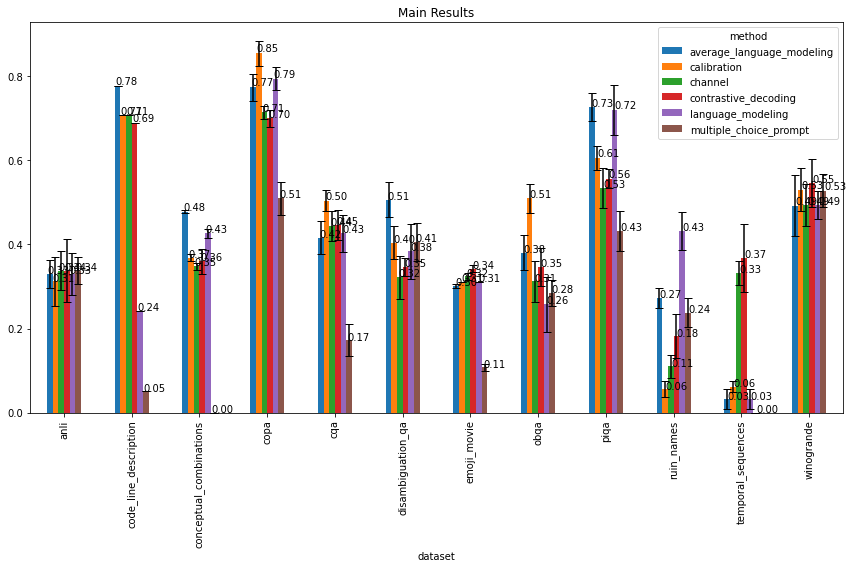

In [20]:
# plot
fig, ax = plt.subplots(figsize=(12, 8))
# group by dataset and method
grouped = df.groupby(["dataset", "method"])
# get the mean and std of the accuracy
mean = grouped["accuracy"].mean().unstack()
std = grouped["accuracy"].std().unstack()
# plot the mean and std
mean.plot.bar(yerr=std, 
              ax=ax, 
              capsize=4, 
              title=f"Main Results",
              )
# add numbers to each bar, with at most 2 decimal places
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() * 1.005, p.get_height() * 1.005))
plt.tight_layout()
fig.savefig(f"cd_main.png", bbox_inches='tight', dpi=300)


In [33]:
latex_df = mean.applymap(lambda x: f"{x*100:.1f}") + std.applymap(lambda x: f"\\textsubscript{{{x*100:.1f}}}")
method_index = ['average_language_modeling', 'calibration', 'channel', 'language_modeling', 'multiple_choice_prompt', 'contrastive_decoding']
latex_df = latex_df.reindex(method_index, axis="columns")
latex_df = latex_df.rename(columns={"average_language_modeling": "avg",
                                    "language_modeling": "lm",
                                    "multiple_choice_prompt": "mcp",
                                    "contrastive_decoding": "cd",
                                    "channel": "cha",
                                    "calibration": "cal",
                                    },
                                    index={"code_line_description": "cld",
                                           "conceptual_combinations": "cc",
                                           "disambiguation_qa": "dq",
                                           "emoji_movie": "em",
                                           "ruin_names": "rn",
                                           "temporal_sequences": "ts",
                                           })

latex_df.style.to_latex(
    buf=f"cd_main.tex",
    column_format="l" + "c" * len(latex_df.columns),
    position="h",
    position_float="centering",
    label="tab:cd_main",
    caption="Main results of contrastive decoding.",
    multicol_align="c",
    multirow_align="c",
)